In [22]:
%load_ext autoreload
%autoreload 2

In [23]:
from src.preprocessing import *
import numpy as np
import pandas as pd

In [24]:
files = get_raw_file_paths('src/pickle_df')

# Load one dataframe
df = pd.read_pickle(files[0])

Process all recordings and sort them by participant, session, and signal type

In [123]:
subjects = 6
sessions = 2
       
trials = [[[[], []]for _ in range(sessions)] for _ in range(subjects)]

for file in files:
    subject = int(file.split('/')[-1][8]) - 1
    session = int(file.split('/')[-1][11]) - 1
    recordings = process_recording(file)

    for recording in recordings:
        if recording[1] == 0:
            trials[subject][session][0].append(recording[0])
        elif recording[1] == 1:
            trials[subject][session][1].append(recording[0])

Take the mean of all signal types for each session

In [124]:
mean_trials = []

for i, subject in enumerate(trials):
    mean_trials.append([])
    for session in subject:
        mean_trials[i].append((
            np.mean(np.array(session[0]), axis=0),
            np.mean(np.array(session[1]), axis=0)
        ))

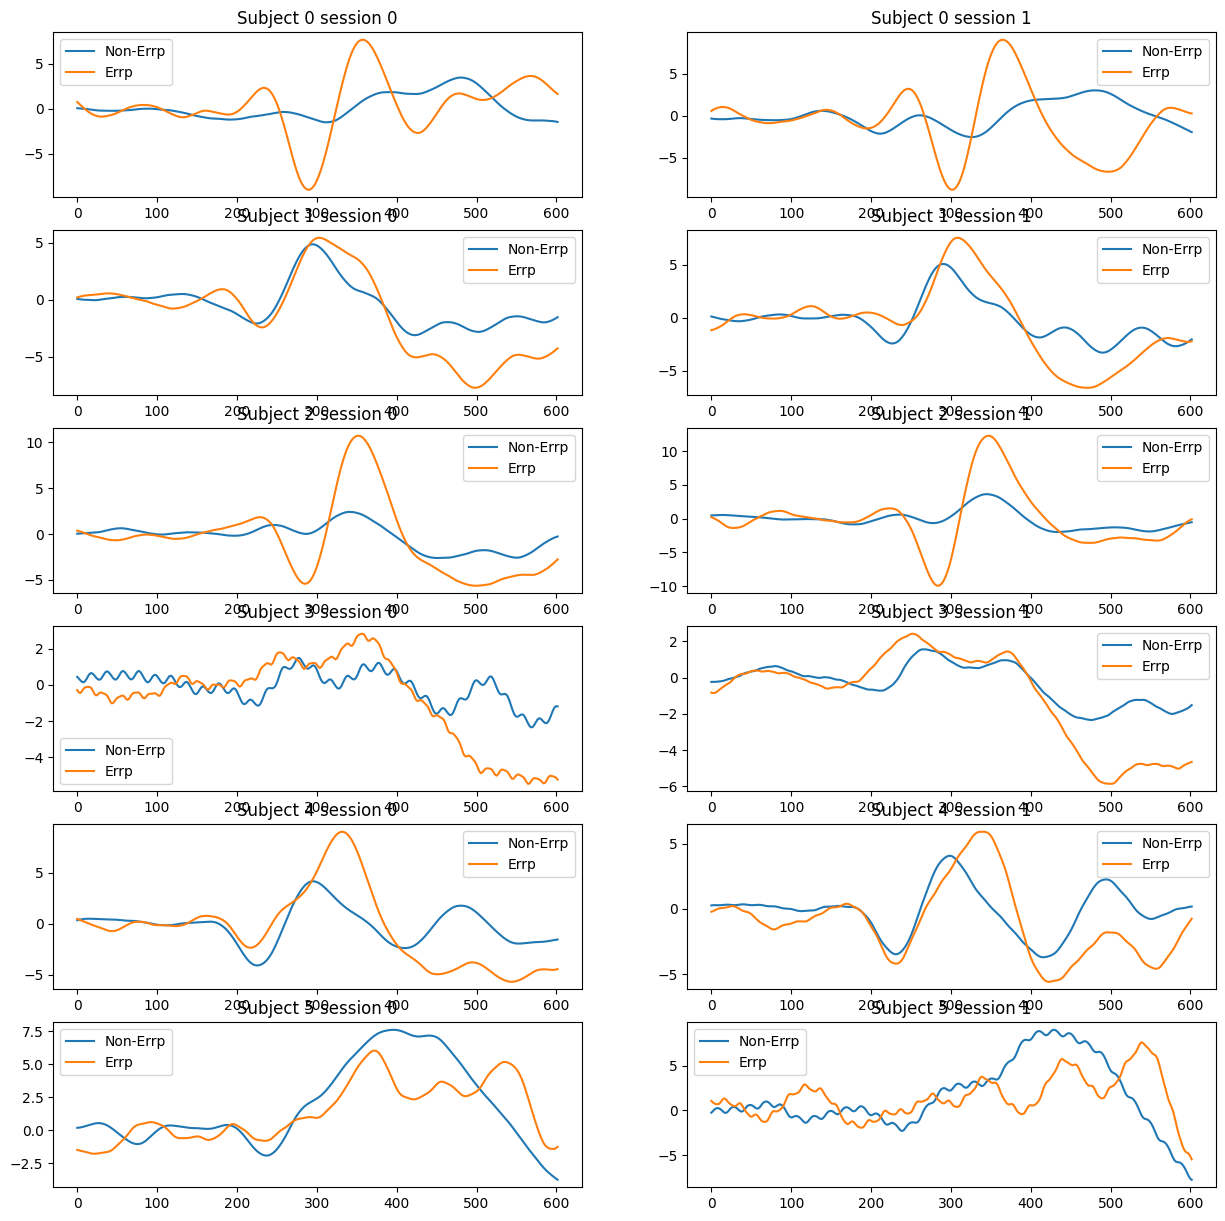

In [138]:
import matplotlib.pyplot as plt

fcz_idx = df.columns.get_loc('FCz')

fcz_len = len(mean_trials[0][0][0][fcz_idx])

duration = fcz_len / 512 * 1000
t = np.linspace(0, duration, fcz_len)

figure, axes = plt.subplots(subjects, sessions, figsize=(15, 15))


for i, subject in enumerate(mean_trials):
    for j, session in enumerate(subject):
        fcz_0 = session[0][fcz_idx]
        fcz_1 = session[1][fcz_idx]

        axes[i, j].plot(t, fcz_0, label='Non-Errp')
        axes[i, j].plot(t, fcz_1, label='Errp')
        axes[i, j].set_title('Subject {subject} session {session}'.format(subject=i, session=j))
        axes[i, j].legend()
       
figure.tight_layout()

In [51]:
df = pd.read_pickle(files[0])
df.columns.get_loc('FCz')

46

In [69]:
f = pd.read_pickle(files[0])
events = df['events'].dropna()
timeseries = df.drop(columns='events')
timeseries_np = timeseries.to_numpy()
timeseries_transposed = np.transpose(timeseries_np)
print(events)
windows = create_windows(timeseries_transposed, events)
print(windows[0][0][0])

6393     0.0
7665     0.0
8949     0.0
11077    0.0
12345    0.0
14825    0.0
16221    0.0
18681    0.0
19841    0.0
21253    0.0
23753    0.0
25149    0.0
26181    0.0
28541    0.0
29929    0.0
31001    0.0
33921    0.0
35033    0.0
36445    0.0
39177    0.0
40273    0.0
41813    0.0
44065    0.0
45161    0.0
46281    1.0
47717    1.0
48877    0.0
49909    0.0
50949    0.0
53869    0.0
55133    0.0
57673    0.0
59069    0.0
61261    0.0
62497    0.0
64761    0.0
65993    1.0
67245    0.0
68721    1.0
70121    0.0
71429    0.0
74009    0.0
75533    0.0
76645    0.0
79105    0.0
80185    0.0
81233    1.0
82613    0.0
84121    0.0
86773    0.0
88089    0.0
90757    0.0
Name: events, dtype: float64
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0.]


IndexError: index 0 is out of bounds for axis 0 with size 0

6393
6701
[[-5.5054438e-01 -1.3869441e+00 -2.2673767e+00 ... -1.0349320e+01
  -1.0035262e+01 -9.7548628e+00]
 [-9.3491232e-01 -1.7537600e+00 -2.6056287e+00 ... -1.0736312e+01
  -1.0279751e+01 -9.8377247e+00]
 [ 1.5771008e+00  6.0456723e-01 -4.0099865e-01 ... -8.8544397e+00
  -8.5801134e+00 -8.3426838e+00]
 ...
 [-7.6954372e-02 -2.8733926e-02  8.7075327e-03 ... -4.8730478e+00
  -4.6820297e+00 -4.4648528e+00]
 [-6.3001031e-01 -4.9146599e-01 -3.4366783e-01 ... -3.4687586e+00
  -3.4079268e+00 -3.3311801e+00]
 [ 9.9053615e-01  1.0974622e+00  1.1842229e+00 ... -3.4638550e+00
  -3.3149641e+00 -3.1095669e+00]]
7665
7973
[[-0.39024785 -0.4239118  -0.48272973 ... -0.89288247 -0.6213137
  -0.31672356]
 [-1.4593694  -1.1834066  -0.9850413  ... -2.4143589  -2.2821803
  -2.1146743 ]
 [-1.3714299  -1.4902649  -1.6213018  ... -1.0030612  -0.7426887
  -0.48991293]
 ...
 [-4.6207685  -4.975336   -5.271061   ...  4.227462    4.0445294
   3.8565524 ]
 [-4.419892   -4.642595   -4.8009524  ...  4.6148443   

IndexError: index 46 is out of bounds for axis 0 with size 0

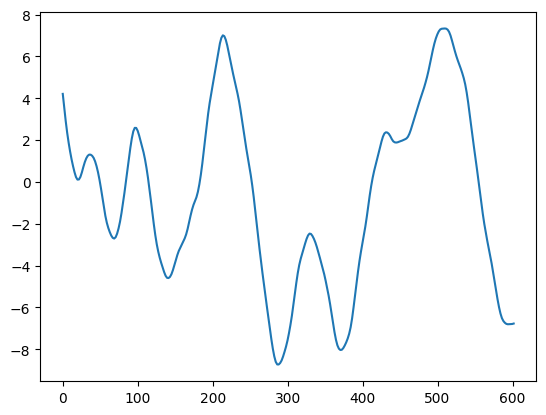

In [88]:
recordings = process_recording(files[0])
signals = recordings[0][0]

fcz = signals[46]

duration = len(fcz) / 512 * 1000
t = np.linspace(0, duration, len(fcz))
import matplotlib.pyplot as plt

plt.plot(t, fcz)

fcz2 = windows[0][0][46]
print(windows)

plt.plot(t, fcz2)


In [26]:
timeseries = df.drop(columns='events')
timeseries_np = timeseries.to_numpy()
timeseries_flipped = np.transpose(timeseries_np)
print(df['Fp1'].to_numpy())
print(df['Fp1'].to_numpy() == (timeseries_flipped[0]))

print((timeseries_flipped[0]))

[8987.96776658 8979.71778182 8980.99902946 ... 8933.09286798 8925.31163235
 8919.03039396]
[ True  True  True ...  True  True  True]
[8987.96776658 8979.71778182 8980.99902946 ... 8933.09286798 8925.31163235
 8919.03039396]


In [27]:
files = get_raw_file_paths('src/pickle_df')

subjects = [[([], []), ([], [])] for _ in range(6)]

for file in files:
    subject = int(file.split('/')[-1][8]) - 1
    session = int(file.split('/')[-1][11]) - 1
    recordings = process_recording(file)
    for recording in recordings:
        if recording[1] == 0:
            subjects[subject][session][0].append(recording[0][46])
        else:
            subjects[subject][session][1].append(recording[0][46])


In [28]:
arr = np.array(subjects[0][0][0])
np.mean(arr, axis=0).shape

(308,)

In [29]:
mean_subjects = [[[None, None], [None, None]] for _ in range(6)]

for i, subject in enumerate(subjects):
    for j, session in enumerate(subject):
        mean_subjects[i][j][0] = np.mean(np.array(session[0]), axis=0)
        mean_subjects[i][j][1] = np.mean(np.array(session[0]), axis=0)

308
308
[3194.9849 3195.0115 3195.1172 3195.2312 3195.2112 3195.0522 3195.004
 3194.9246 3194.912  3195.0146 3195.167  3195.2585 3195.3699 3195.4316
 3195.4614 3195.3574 3195.3079 3195.1792 3195.0813 3195.0994 3195.215
 3195.187  3195.1    3195.1777 3195.2134 3195.1418 3195.1543 3195.0386
 3194.9294 3194.9277 3194.9934 3195.0422 3195.0588 3195.165  3195.2085
 3195.1406 3195.1912 3195.2302 3195.0564 3194.8887 3194.851  3194.9229
 3194.9053 3194.989  3195.1272 3195.0188 3194.7922 3194.8481 3194.805
 3194.6934 3194.7747 3194.9016 3194.8809 3195.0308 3195.179  3195.2134
 3195.0557 3194.936  3194.8533 3194.7935 3194.769  3194.8684 3194.9304
 3194.9915 3195.0862 3195.06   3194.9377 3194.91   3194.8184 3194.6863
 3194.666  3194.7056 3194.612  3194.5818 3194.7634 3194.9058 3194.8137
 3194.7917 3194.7378 3194.5857 3194.5518 3194.6301 3194.7615 3194.7622
 3194.804  3194.9058 3194.904  3194.796  3194.7732 3194.5554 3194.423
 3194.498  3194.5984 3194.5767 3194.646  3194.8162 3194.8633 3194.7234
 3

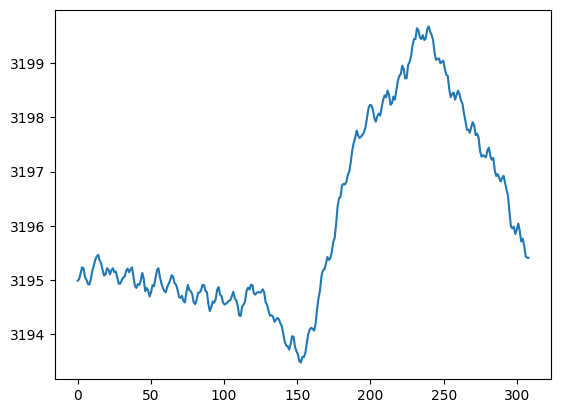

In [30]:
import matplotlib.pyplot as plt

fcz = mean_subjects[0][0][0]
print(len(fcz))
t = np.linspace(0, len(fcz), len(fcz))
print(len(t))
plt.plot(t, fcz)
print(fcz)

308
308
[3194.9849 3195.0115 3195.1172 3195.2312 3195.2112 3195.0522 3195.004
 3194.9246 3194.912  3195.0146 3195.167  3195.2585 3195.3699 3195.4316
 3195.4614 3195.3574 3195.3079 3195.1792 3195.0813 3195.0994 3195.215
 3195.187  3195.1    3195.1777 3195.2134 3195.1418 3195.1543 3195.0386
 3194.9294 3194.9277 3194.9934 3195.0422 3195.0588 3195.165  3195.2085
 3195.1406 3195.1912 3195.2302 3195.0564 3194.8887 3194.851  3194.9229
 3194.9053 3194.989  3195.1272 3195.0188 3194.7922 3194.8481 3194.805
 3194.6934 3194.7747 3194.9016 3194.8809 3195.0308 3195.179  3195.2134
 3195.0557 3194.936  3194.8533 3194.7935 3194.769  3194.8684 3194.9304
 3194.9915 3195.0862 3195.06   3194.9377 3194.91   3194.8184 3194.6863
 3194.666  3194.7056 3194.612  3194.5818 3194.7634 3194.9058 3194.8137
 3194.7917 3194.7378 3194.5857 3194.5518 3194.6301 3194.7615 3194.7622
 3194.804  3194.9058 3194.904  3194.796  3194.7732 3194.5554 3194.423
 3194.498  3194.5984 3194.5767 3194.646  3194.8162 3194.8633 3194.7234
 3

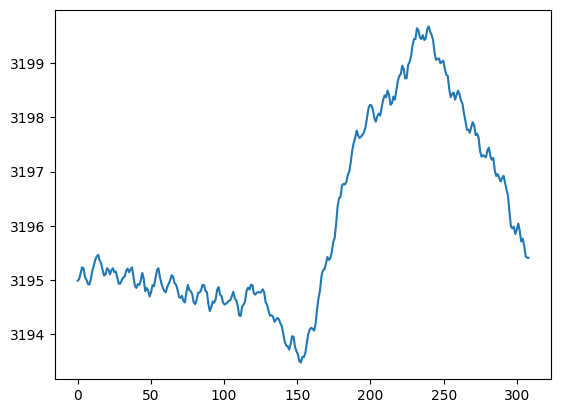

In [90]:
import matplotlib.pyplot as plt

fcz = mean_subjects[0][0][1]
print(len(fcz))
t = np.linspace(0, len(fcz), len(fcz))
print(len(t))
plt.plot(t, fcz)
print(fcz)